## Peso Chileno, El Espejo del Cobre
Como buen país exportador de commodities, el tipo de cambio en Chile está muy ligado a la cotización del cobre. A mayor cotización del metal mayor cantidad de dólares ingresarán y posteriormente circularán en el país, a menor cotización caso contrario, el billete verde no será tan abundante en la economía, por ende, tenderá a apreciarse respecto al peso chileno (ley de oferta y demanda).

A continuación graficaremos con Matplotlib y Plotly la correlación entre ambos activos.

In [11]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [12]:
activos = ['CLP=X', 'HG=F']
precioCierre = yf.download(activos, period='5y', interval='1wk')['Close']
precioCierre = precioCierre.dropna() # eliminando datos N/A
print(precioCierre)

[*********************100%***********************]  2 of 2 completed
                 CLP=X    HG=F
Date                          
2018-04-16  584.409973  3.1315
2018-04-23  605.700012  3.0460
2018-04-30  621.799988  3.0655
2018-05-07  617.900024  3.0950
2018-05-14  637.000000  3.0510
...                ...     ...
2023-03-13  830.109985  3.9135
2023-03-20  810.000000  4.1015
2023-03-27  788.820007  4.1045
2023-04-03  817.780029  4.0260
2023-04-10  796.869995  4.1185

[261 rows x 2 columns]


### Retorno Acumulado

In [13]:
retornoDiario = precioCierre.pct_change()
retornoDiario.tail()

,CLP=X,HG=F
Date,,
2023-03-13,0.042564,-0.032629
2023-03-20,-0.024226,0.048039
2023-03-27,-0.026148,0.000731
2023-04-03,0.036713,-0.019125
2023-04-10,-0.025569,0.022976


In [14]:
retornoAcumulado = (1+retornoDiario).cumprod()-1
retornoAcumulado = retornoAcumulado.dropna() # eliminando datos N/A
print(retornoAcumulado)

               CLP=X      HG=F
Date                          
2018-04-23  0.036430 -0.027303
2018-04-30  0.063979 -0.021076
2018-05-07  0.057306 -0.011656
2018-05-14  0.089988 -0.025706
2018-05-21  0.068257 -0.020597
...              ...       ...
2023-03-13  0.420424  0.249721
2023-03-20  0.386013  0.309756
2023-03-27  0.349772  0.310714
2023-04-03  0.399326  0.285646
2023-04-10  0.363546  0.315184

[260 rows x 2 columns]


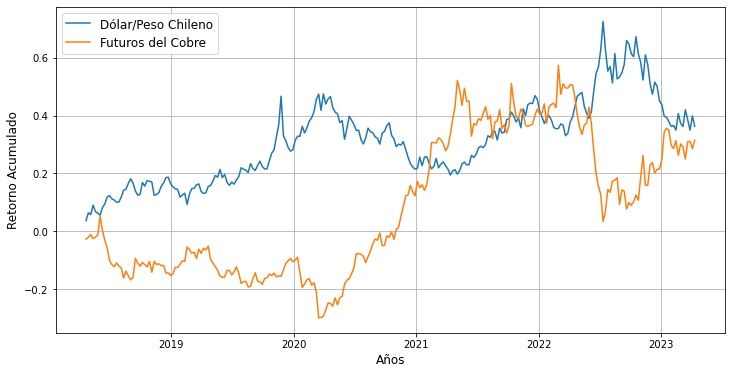

In [15]:
# graficando con matplotlib
usdclp = retornoAcumulado['CLP=X']
cobre = retornoAcumulado['HG=F']

plt.figure(figsize=(12, 6))
plt.plot(usdclp, label='Dólar/Peso Chileno')
plt.plot(cobre, label='Futuros del Cobre')

plt.ylabel('Retorno Acumulado', fontsize=12)
plt.xlabel('Años', fontsize=12)
plt.legend(loc=2, fontsize=12)
plt.grid() 

plt.show()

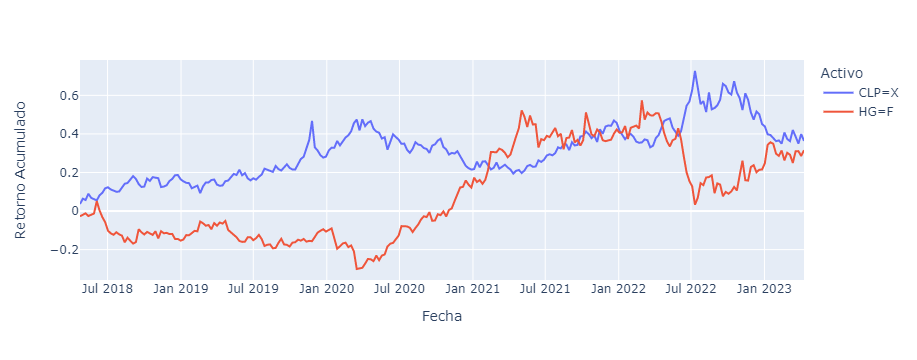

In [16]:
# graficando con plotly
df = retornoAcumulado

fig = px.line(df,
              labels={'value':'Retorno Acumulado', 
                      'Date':'Fecha', 
                      'variable':'Activo'})
fig.show()

Se observa el espejo entre ambos activos durante los último 5 años. Sin embargo, esto se interrumpe a mediados del 2021, debido a temas ligados a la incertidumbre política que vivía el país (elección presidencial dividida y potencial nueva constitución), lo que condujo a una fuga de capitales, es decir, el dólar comenzo a escasear en Chile. En otras palabras, a pesar de la apreciación del cobre y commodities en general a nivel internacional, la moneda local perdía valor contra el dólar.

Tambien vemos una distorción efímera durante el último trimestre del 2019, debido al "estallido social", lo que derivó en una apreciación significativa del dólar. A partir del 2022, el panorama comienza a estabilizarse, retornando el efecto espejo entre ambos activos.

### Correlación

In [17]:
rollingCorr = retornoDiario['HG=F'].rolling(window=12).corr(retornoDiario['CLP=X'])
rollingCorr = rollingCorr.dropna()
print(rollingCorr)

Date
2018-07-09   -0.471849
2018-07-16   -0.438695
2018-07-23   -0.565070
2018-07-30   -0.548522
2018-08-06   -0.590300
                ...   
2023-03-13   -0.651121
2023-03-20   -0.738876
2023-03-27   -0.702304
2023-04-03   -0.693420
2023-04-10   -0.720246
Freq: W-MON, Length: 249, dtype: float64


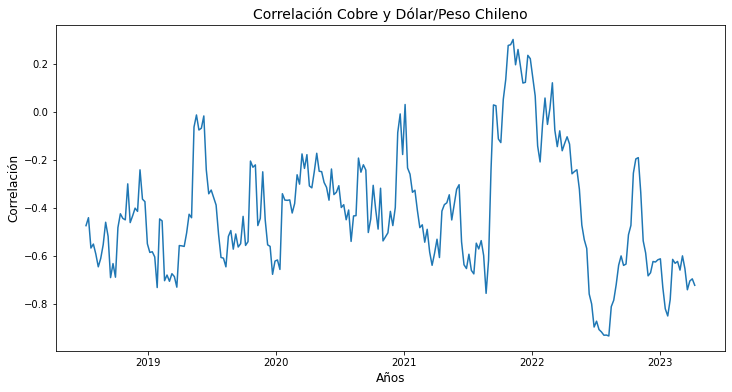

In [18]:
# graficando con matplotlib
plt.figure(figsize=(12, 6))
plt.plot(rollingCorr)

plt.title('Correlación Cobre y Dólar/Peso Chileno', fontsize=14)
plt.ylabel('Correlación', fontsize=12)
plt.xlabel('Años', fontsize=12)

plt.show()

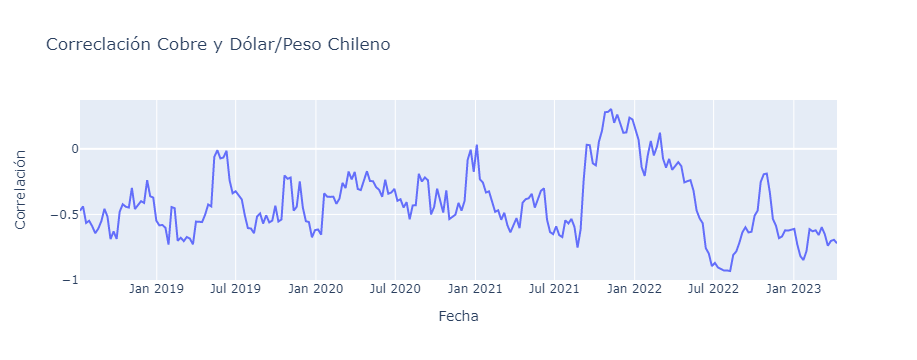

In [19]:
# graficando con plotly
df = rollingCorr

fig = px.line(df,
              labels={'value':'Correlación', 
                      'Date':'Fecha'},
              title='Correclación Cobre y Dólar/Peso Chileno')
fig.update_layout(showlegend=False)
             
fig.show()

In [20]:
rollingCorr.mean()

-0.4113256949128437

Durante estos 5 años de datos la media de la correlacion es de -41.13%. Hasta septiembre del 2021 la máxima correlacion fue del 0%, luego la correlación comienza a ser mayor, por lo ya mencionado, llegando a 20%, a partir del primer trimestre del 2022 la correlación negativa entre ambos retorna.